# Let us look at Abell 2744 and try to understand what is going on...
![title](HST/ds9.jpeg)
<!-- <div>
<img src="ds9.jpeg" width="500"/>
</div> -->


# Import relevant packages

In [40]:
# LensFactory for lensing calcualtions
using LensFactory
using LensFactory.Constants

# For plotting
using CairoMakie

# Setting up cosmology

In [41]:
# Initialize default cosmology
cosmo = Cosmology.init_cosmology()

# Lens and source redshifts
zl = 0.5
zs = 1.5

# ADDs and distance ratio
Dol = Cosmology.angular_diameter_distance(cosmo, 0., zl)
Dls = Cosmology.angular_diameter_distance(cosmo, zl, zs)
Dos = Cosmology.angular_diameter_distance(cosmo, 0., zs)
adis = Dls/Dos

0.5672117739208741

# Lensing a background Gaussian source by a point lens

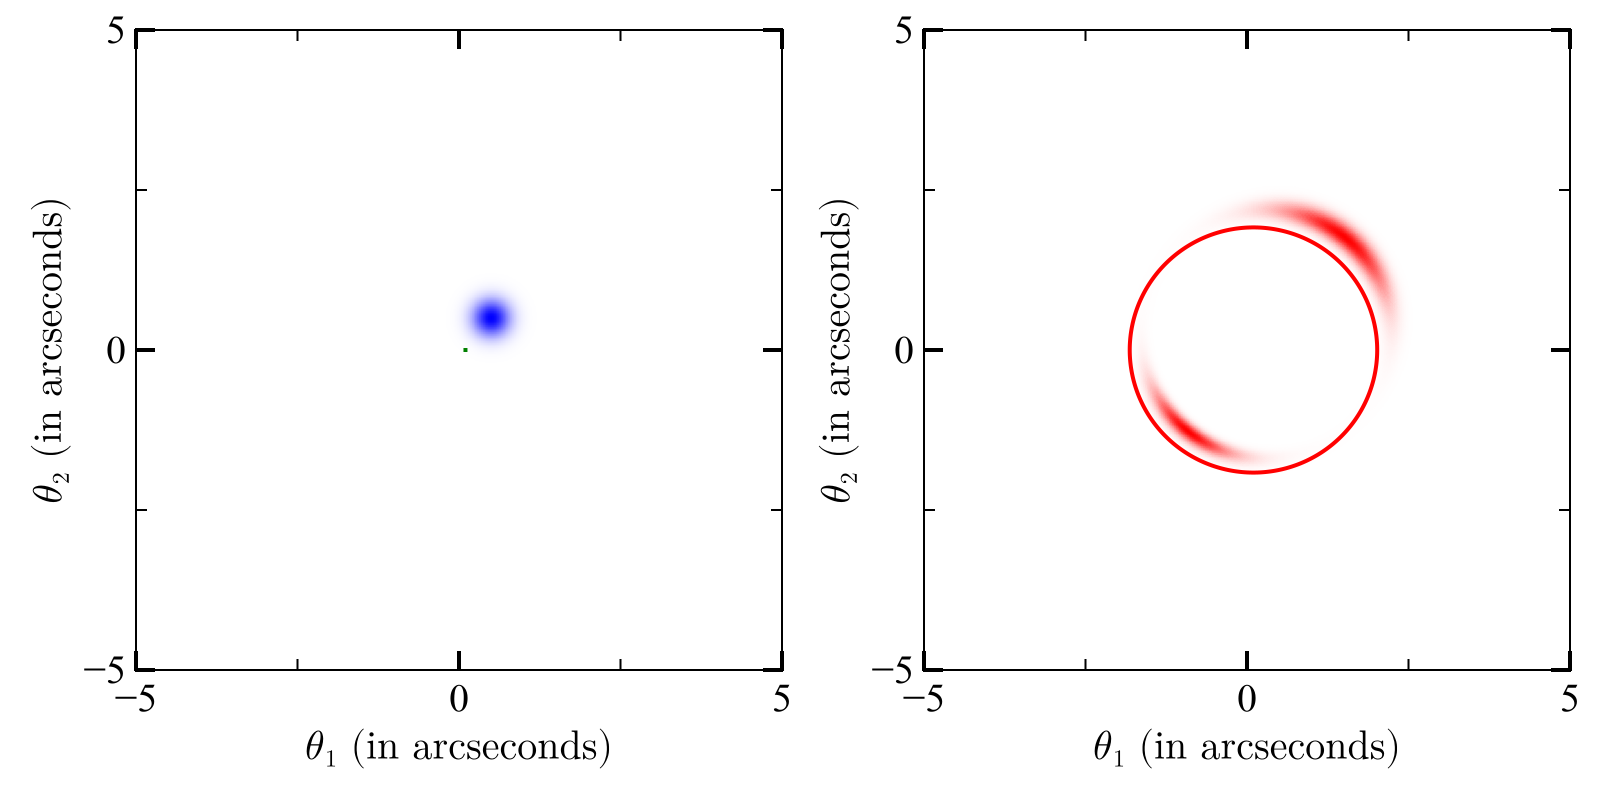

CairoMakie.Screen{IMAGE}


In [42]:
# Create image plane grid (default units are ANGLE_ARCSEC)
x, y = Lenses.get_meshgrid(5, 5, 0.01);

# Initialize an isolated point mass lens
lens = Lenses.init_PointLens(D_d = Dol, x_c=0.1, mass=1E12*MASS_SUN)

# Let us add an extended source
src = Sources.gaussian(x, y, 0.2, 0.2, (0.5, 0.5), A=1)

# Here we have split the source and image plane for better visualization using "two_panel" keyword
fig, ax = Lenses.plot_image_plane(lens, x, y, adis; two_panel=true, source=src)
display(fig)

# Let us have a somewhat more complicated lens

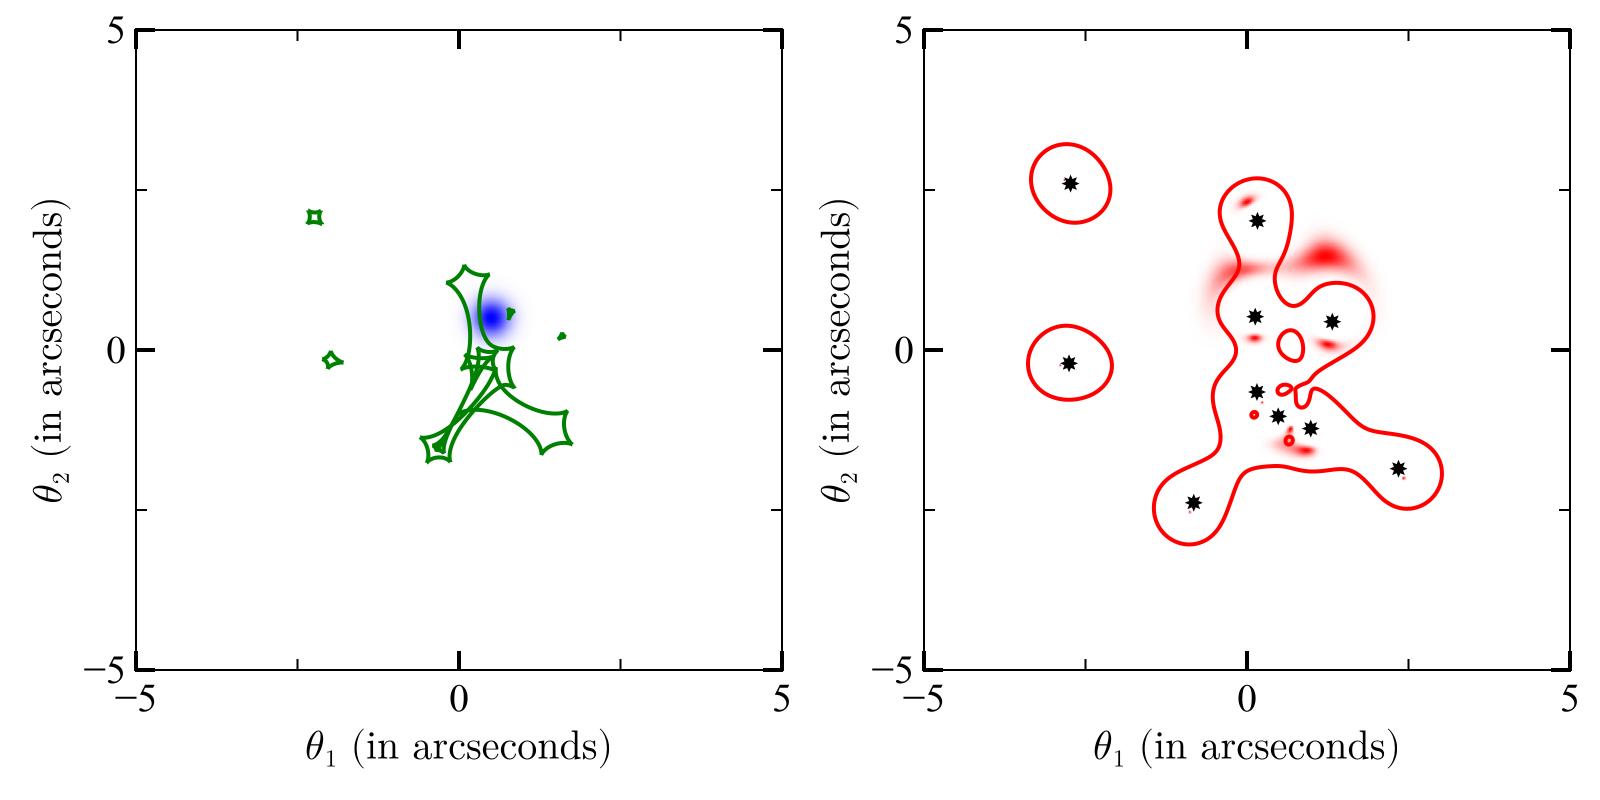

CairoMakie.Screen{IMAGE}


In [43]:
# Fix seed for reproducibility
using Random
Random.seed!(123)

# Initialize a lens made of multiple point mass lenses
n_point = 10
ensamble = [(lens=:PointLens, D_d=Dol, x_c=(-3.0 + 6.0*rand()), y_c = (-3.0 + 6.0*rand()), mass=1E11*MASS_SUN) for _ in 1:n_point]
lens = Lenses.init_CompositeLens(ensamble)

# Here we have split the source and image plane for better visualization using "two_panel" keyword
fig, ax = Lenses.plot_image_plane(lens, x, y, adis; two_panel=true, source=src)
scatter!(ax[2], [l.x_c for l in lens._components_], [l.y_c for l in lens._components_], color=:black, markersize=10, marker=:star8)
display(fig)